In [1]:
%matplotlib inline
import pandas as pd

In [2]:
filename= "../../../Data/Weather/stations_projections.pickle"
!ls -l $filename

-rw-r--r--  1 yoavfreund  staff  2816937 Apr 24 11:05 ../../../Data/Weather/stations_projections.pickle


In [3]:
import pickle
df=pickle.load(open(filename,'r'))

In [4]:
df.head(1)

,station,TAVG_coeff,TRANGE_coeff,SNWD_coeff,latitude,longitude,elevation,dist_coast
0,USC00044534,"[3047.96236332, 1974.34852034, 150.560792408]","[-2903.63287861, -236.907267527, 147.021790682]","[0.19150300062, 0.187262808215, -0.0401379552536]",36.0042,-119.96,73.2,107.655


In [5]:
# break each coeff column into multiple columns, taking only the top 2 coeffs from each variable
for col in [u'TAVG_coeff', u'TRANGE_coeff', u'SNWD_coeff']:
    for i in range(2):
        new_col=col+str(i+1)
        df[new_col]=[e[i] for e in list(df[col])]
    df.drop(labels=col,axis=1,inplace=True)
df.drop(labels='station',axis=1,inplace=True)
df.head(1)

,latitude,longitude,elevation,dist_coast,TAVG_coeff1,TAVG_coeff2,TRANGE_coeff1,TRANGE_coeff2,SNWD_coeff1,SNWD_coeff2
0,36.0042,-119.96,73.2,107.655,3047.962363,1974.34852,-2903.632879,-236.907268,0.191503,0.187263


### Scatter Matrix
The [scatter_matrix](http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot) command is useful for getting an idea of the pair-wise relations between columns in a dataframe.

/Users/yoavfreund/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


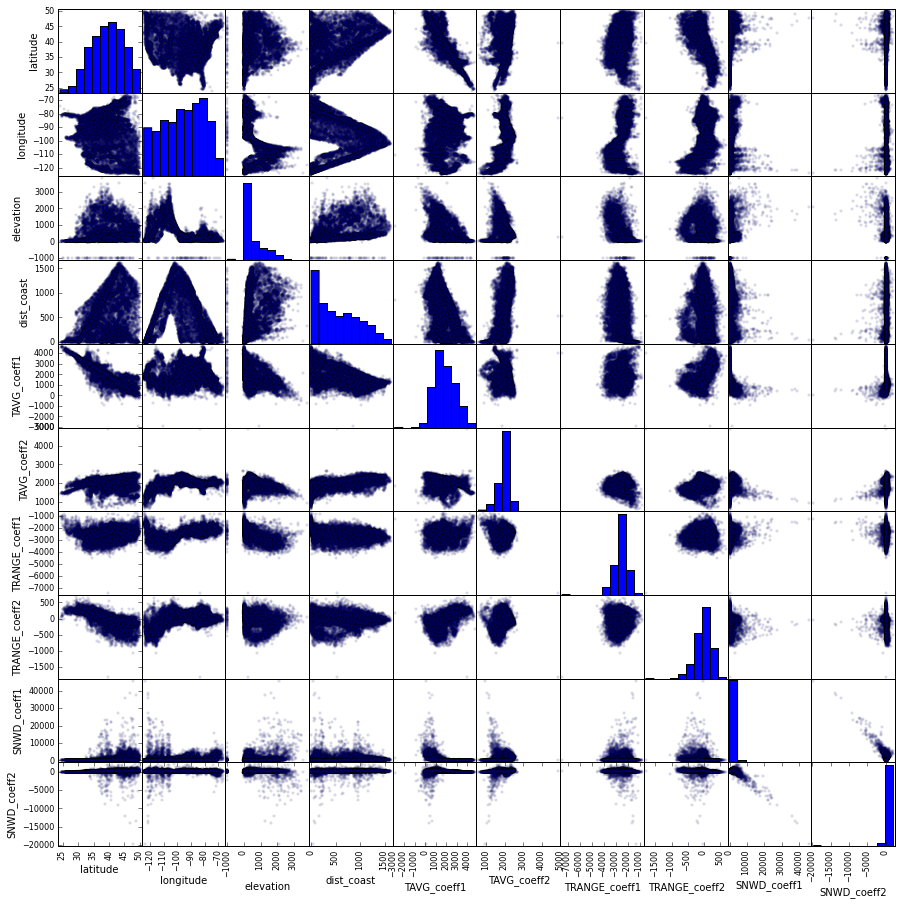

In [6]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.1, figsize=(15, 15));